In [8]:
import numpy as np

In [5]:
import pickle
import matplotlib.pyplot as plt

def load_pickle_data(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

# Replace these filenames with the correct paths to your pickle files.
file0 = 'data/nina_measurements0pi1-1.pkl'
file1 = 'data/nina_measurementspi-1.pkl'
file2 = 'data/nina_measurements_31_1-1.pkl'

# Load the data from the pickle files
data0 = load_pickle_data(file0)
data1 = load_pickle_data(file1)
data2 = load_pickle_data(file2)

In [7]:
data2[3]

[0.9987690295757488,
 0.9987226082128038,
 0.998728752773512,
 0.9987881899366579,
 0.9987856732989557,
 0.9988000283012752,
 0.9987678706275391,
 0.9987780220013367,
 0.9987893258342204,
 0.9987392213698643,
 0.9988082033508966,
 0.9987297220591236,
 0.9987921427808557,
 0.9987202954571432,
 0.9988070571057681,
 0.9988325636100259,
 0.9988242465555429,
 0.998718235522966,
 0.9987791305872862,
 0.9988300418144073,
 0.9988099269727349,
 0.998708271938119,
 0.9987652574739276,
 0.998719667491555,
 0.998816445443927,
 0.9987383822988561,
 0.9987230663600685,
 0.9988107757893716,
 0.9987478714836957,
 0.9987597762150972,
 0.9988332292782967,
 0.9987637849749057,
 0.9987450249837658,
 0.9987722736481861,
 0.9988130525372146,
 0.99884695214875,
 0.9987269978545521,
 0.9988142120024317,
 0.9987707909946736,
 0.998824478812538,
 0.9987447795280608,
 0.9987188924808459,
 0.9988026495928418,
 0.998757477012827,
 0.9988020098210498,
 0.9988290402660875,
 0.9987600741868622,
 0.9987917239503757,
 

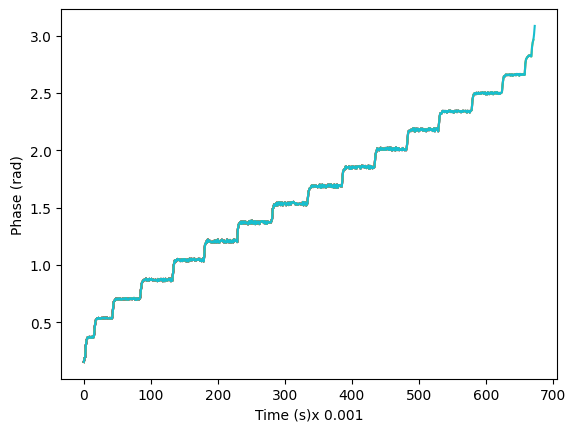

In [ ]:
data_2=[]
for i in range(20):
    for j in range(1,60):
        if abs(data2[3][60*i+j]-data2[3][60*i+j-1])> 0.001:
            data_2.append(2*np.arccos(np.sqrt(data2[3][60*i+j])))
    plt.plot(data_2)
    #plt.ylim(0,1.05)
    plt.xlabel("Time (s)x 0.001")
    plt.ylabel("Phase (rad)")
    
# calculate the rate of change of the phase in time


In [17]:
# Extract the time interval, starting phases, and end phases
time_interval = data2[0]  # Time interval between samples (in seconds)
start_phases = data2[1]   # Starting phases
end_phases = data2[2]     # End phases
measurements = data2[3]   # Core measurement series

# Initialize a list to store transition times
transition_times = []

phase_data_dic = {}

# Loop through each of the 20 measurements
for i in range(20):
    start_phase = start_phases[i]
    end_phase = end_phases[i]
    
    # Extract the 60 time samples for the current measurement
    phase_data = measurements[60 * i: 60 * (i + 1)]
    for i in range(20):
        phase_data = measurements[60 * i: 60 * (i + 1)]
        print(f"Measurement {i + 1}:")
        print(f"Phase Data: {phase_data}")
        print(f"Start Phase: {start_phases[i]}, End Phase: {end_phases[i]}")
        
    phase_data_dic[i] = phase_data
    
    # Find the indices where the phase starts and ends
    start_index = next((j for j, phase in enumerate(phase_data) if abs(phase - start_phase) > 0.01), None)
    end_index = next((j for j, phase in enumerate(phase_data) if abs(phase - end_phase) < 0.01), None)
    
    if start_index is not None and end_index is not None:
        # Calculate the transition time
        transition_time = (end_index - start_index) * time_interval
        transition_times.append(transition_time)
    else:
        # If no transition is detected, append None
        transition_times.append(None)

# Print the transition times
for i, t in enumerate(transition_times):
    print(f"Transition {i + 1}: {t:.3f} seconds" if t is not None else f"Transition {i + 1}: No transition detected")

Measurement 1:
Phase Data: [0.9987690295757488, 0.9987226082128038, 0.998728752773512, 0.9987881899366579, 0.9987856732989557, 0.9988000283012752, 0.9987678706275391, 0.9987780220013367, 0.9987893258342204, 0.9987392213698643, 0.9988082033508966, 0.9987297220591236, 0.9987921427808557, 0.9987202954571432, 0.9988070571057681, 0.9988325636100259, 0.9988242465555429, 0.998718235522966, 0.9987791305872862, 0.9988300418144073, 0.9988099269727349, 0.998708271938119, 0.9987652574739276, 0.998719667491555, 0.998816445443927, 0.9987383822988561, 0.9987230663600685, 0.9988107757893716, 0.9987478714836957, 0.9987597762150972, 0.9988332292782967, 0.9987637849749057, 0.9987450249837658, 0.9987722736481861, 0.9988130525372146, 0.99884695214875, 0.9987269978545521, 0.9988142120024317, 0.9987707909946736, 0.998824478812538, 0.9987447795280608, 0.9987188924808459, 0.9988026495928418, 0.998757477012827, 0.9988020098210498, 0.9988290402660875, 0.9987600741868622, 0.9987917239503757, 0.9988125015382826, 0

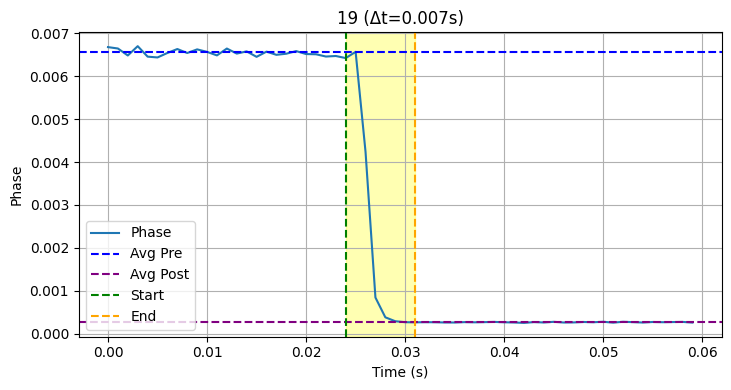

Phase Shift Duration Summary:
19: 0.0070 seconds


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_phase_shifts(data_dict, timestep=0.001):
    summary = {}
    num_measurements = len(data_dict)
    cols = 2
    rows = (num_measurements + cols - 1) // cols  # round up

    fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4), squeeze=False)
    threshold = 0.0001  # Smaller threshold for sensitive detection

    for idx, (label, phase_data) in enumerate(data_dict.items()):
        phase_data = np.array(phase_data)
        time = np.arange(len(phase_data)) * timestep
        row, col = divmod(idx, cols)
        ax = axes[row][col]

        avg_pre = np.mean(phase_data[(time >= 0.00) & (time <= 0.02)])
        avg_post = np.mean(phase_data[(time >= 0.03) & (time <= 0.06)])

        start_index = next(j for j in range(len(time)) if time[j] > 0.02 and phase_data[j] < avg_pre - threshold)
        end_index = next(j for j in range(start_index + 1, len(phase_data)) if phase_data[j] <= avg_post)
        duration = (end_index - start_index) * timestep
        summary[label] = duration

        ax.plot(time, phase_data, label='Phase')
        ax.axhline(avg_pre, color='blue', linestyle='--', label='Avg Pre')
        ax.axhline(avg_post, color='purple', linestyle='--', label='Avg Post')
        ax.axvline(time[start_index], color='green', linestyle='--', label='Start')
        ax.axvline(time[end_index], color='orange', linestyle='--', label='End')
        ax.axvspan(time[start_index], time[end_index], color='yellow', alpha=0.3)

        ax.set_title(f"{label} (Δt={duration:.3f}s)")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Phase")
        ax.grid(True)
        ax.legend(loc='lower left')

    # Turn off unused subplots
    for idx in range(len(data_dict), rows * cols):
        row, col = divmod(idx, cols)
        fig.delaxes(axes[row][col])

    plt.tight_layout()
    plt.show()

    # Print summary
    print("Phase Shift Duration Summary:")
    for label, dur in summary.items():
        print(f"{label}: {dur:.4f} seconds")

    return summary






# Analyze the phase shifts for the first dataset
summary0 = analyze_phase_shifts(phase_data_dic)

In [16]:
print("Data from file0:", type(data2))
if isinstance(data2, dict):
    print("Keys in file0:", data2.keys())
# print("Data from file1:", type(data1))
# if isinstance(data1, dict):
#     print("Keys in file1:", data1.keys())
    
if isinstance(data2, dict) and 'time' in data2 and 'phase' in data2:
    time0 = data2['time']
    phase0 = data2['phase']
else:
    time0, phase0 = data2

# if isinstance(data1, dict) and 'time' in data1 and 'phase' in data1:
#     time1 = data1['time']
#     phase1 = data1['phase']
# else:
#     time1, phase1 = data1
    
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time0, phase0, 'o-', label="Measurement 0pi1-1")
plt.xlabel("Time (s)")
plt.ylabel("Phase (radians)")
plt.title("Thermal Response: Measurement 0pi1-1")
plt.legend()
plt.grid(True)

# plt.subplot(1, 2, 2)
# plt.plot(time1, phase1, 'o-', color='orange', label="Measurement pi-1")
# plt.xlabel("Time (s)")
# plt.ylabel("Phase (radians)")
# plt.title("Thermal Response: Measurement pi-1")
# plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()

Data from file0: <class 'list'>


ValueError: too many values to unpack (expected 2)

In [ ]:

# For debugging: print the type and keys (if data is a dict)
print("Data from file0:", type(data0))
if isinstance(data0, dict):
    print("Keys in file0:", data0.keys())
print("Data from file1:", type(data1))
if isinstance(data1, dict):
    print("Keys in file1:", data1.keys())

# Assuming each file contains a dictionary with keys 'time' and 'phase',
# otherwise, adjust the following accordingly:
if isinstance(data0, dict) and 'time' in data0 and 'phase' in data0:
    time0 = data0['time']
    phase0 = data0['phase']
else:
    # Otherwise assume data0 is a tuple or list: (time, phase)
    time0, phase0 = data0

if isinstance(data1, dict) and 'time' in data1 and 'phase' in data1:
    time1 = data1['time']
    phase1 = data1['phase']
else:
    time1, phase1 = data1

# Plot the two measurements side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time0, phase0, 'o-', label="Measurement 0pi1-1")
plt.xlabel("Time (s)")
plt.ylabel("Phase (radians)")
plt.title("Thermal Response: Measurement 0pi1-1")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time1, phase1, 'o-', color='orange', label="Measurement pi-1")
plt.xlabel("Time (s)")
plt.ylabel("Phase (radians)")
plt.title("Thermal Response: Measurement pi-1")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()